In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso

In [6]:
data = pd.read_csv('car_age_price.csv')

In [7]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [45]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [46]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [13]:
data.describe()  # 5 number summary

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [11]:
data.shape

(112, 2)

In [15]:
corr=data.corr()
corr

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


# Split the data into training and testing sets

In [20]:
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


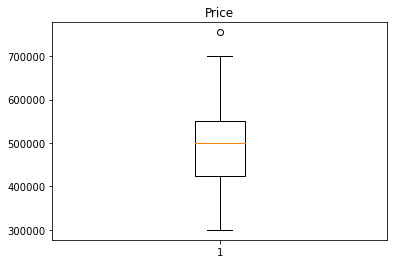

In [34]:
plt.figure()           
plt.boxplot(data['Price'])
plt.title('Price')
plt.show()

# Linear Regression Model

In [27]:
lin_reg = LinearRegression()

# Fiting the model to the training data
lin_reg.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = lin_reg.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 3300622013.4584727


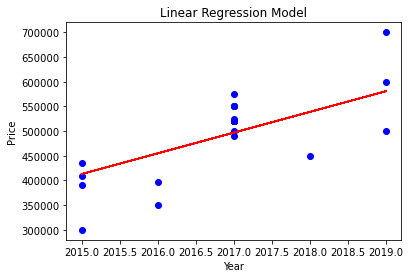

In [22]:
# ploting the linear regression model
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, lin_reg.predict(X_test), color='red')
plt.title('Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


# Lasso Regression Model

In [28]:
lasso_reg = Lasso(alpha=0.1)

# Fiting the model to the training data
lasso_reg.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = lasso_reg.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 3300623363.7017994


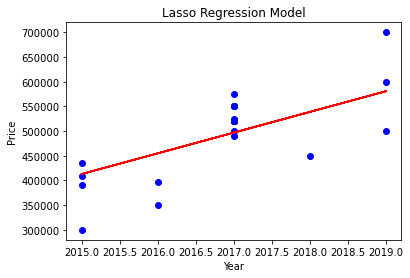

In [30]:
# Visualize the lasso regression model
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, lasso_reg.predict(X_test), color='red')
plt.title('Lasso Regression Model')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()



# Price Prediction

In [52]:
# Predict the possible price of a 2022 model second-hand car
year = np.array([[2022]])
price = lin_reg.predict(year)

# Print the predicted price
print('Predicted price of a 2022 model second-hand grand i10:', price)



Predicted price of a 2022 model second-hand grand i10: [[706492.63303144]]
